#**Расчетное задание №5**

##Степанищев Степан, гр. 23171

Подключаем библиотеки

---



In [75]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stts

Вводим данные задачи

---



In [46]:
V=6

X=np.array([[V+13], [V+16], [V+19], [V+23], [V+26], [V+30], [V+42]])
Y=np.array([V+3, V+5, V+4, V+6, V+6, V+9, V+8])

Оцениваем параметры линейной регрессии с помощью МНК

---



In [47]:
X_expanded = np.concatenate((np.array([[1]*len(X)]).T, X), axis=1)

b=(np.linalg.inv(X_expanded.T @ X_expanded) @ X_expanded.T) @ Y
b

array([6.34393638, 0.18290258])

Построим прямую $y=b_0+x*b_1$

---



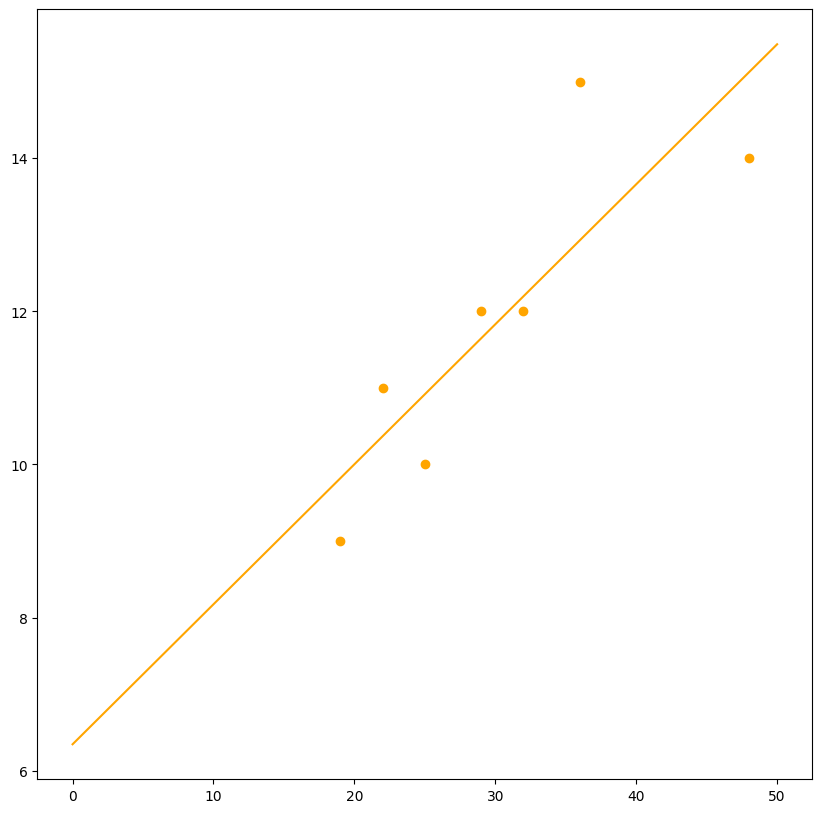

In [49]:
scale=10

fig, ax = plt.subplots(figsize = (scale, scale))
ax.scatter(X, Y, c = 'orange')

grid = np.linspace(0, 50, 1000)
curve = b[0]+grid*b[1]
ax.plot(grid, curve, c = 'orange')

Вычислим линейный коэффициент корреляции между $X$ и $Y$.

---



In [57]:
X_mean = np.array([X.mean()]*len(X))
Y_mean = np.array([Y.mean()]*len(Y))

nom = np.dot(X.T-X_mean, Y.T-Y_mean)
denom = np.sqrt(np.sum((X.T-X_mean) ** 2)*np.sum((Y.T-Y_mean) ** 2))
r_XY = nom/denom
r_XY[0]

0.8461939260999831

Вычислим коэффициент детерминации $R^2$.

---



In [63]:
Y_pred = b[0]+X*b[1]

RSS = np.sum((Y - Y_pred.T) ** 2)
TSS = np.sum((Y - Y.mean()) ** 2)
R_squared= (TSS-RSS)/TSS
R_squared

0.7160441605685037

**Вывод:** модель на 71% соответствует данным, на которых она построена.

Вычислим стандартную ошибку регрессии.

---



In [68]:
N=len(X)
n=len(b) - 1

s_squared=RSS / (N - n - 1)
s_squared

1.5252485089463224

Найдём значение $Y$ для $X=10$.

---



In [70]:
X_test=10
Y_test = b[0]+X_test*b[1]
Y_test

8.172962226640138

Проверим гипотезу о значимости параметров по критерию Стьюдента. Проверяем $H_{0j}= \{b_j = 0\}$.

---



In [88]:
M = np.linalg.inv(X_expanded.T @ X_expanded)
s = np.array([np.sqrt(s_squared*M[0][0]), np.sqrt(s_squared*M[1][1])])
t = np.array([b[0]/s[0], b[1]/s[1]])

alpha = 0.05
t_cr = stts.t.ppf(1-alpha, N-n-1)
display(f'Is b[0] sagnificant? {t[0]>t_cr}', f'Is b[1] sagnificant? {t[1]>t_cr}')

'Is b[0] sagnificant? True'

'Is b[1] sagnificant? True'

**Вывод:** отвергаем гипотезу о том, что параметры равны нулю. Следовательно, считаем их значимыми (при уровне значимости $0.05$).

Проверим гипотезу о значимости регрессии в целом по критерию Фишера. Проверяем $H_0 = \{b_1=b_2=0\}$.

---



In [90]:
F = (R_squared*(N-n-1))/(n*(1-R_squared))
F_cr = stts.f.ppf(alpha, n, N-n-1)
display(f'Is method sagnificant? {F>F_cr}')

'Is method sagnificant? True'

**Вывод:** модель значима.